# Попробовать добавить train и eval

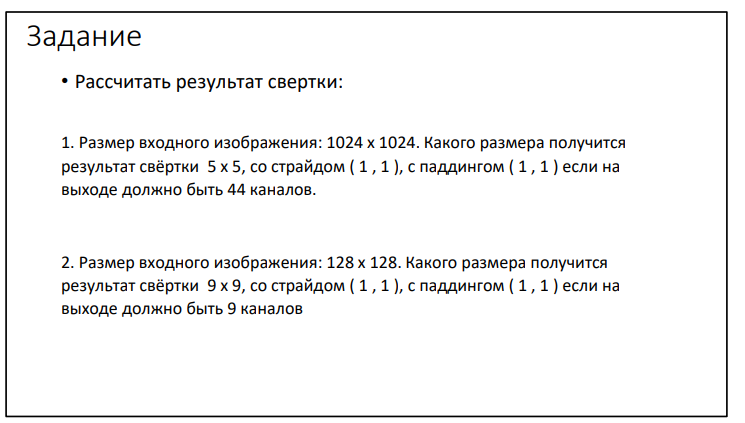

$
W_{out}=\frac{W_{in}-K+2P}{S}
\quad
H_{out}=\frac{H_{in}-K+2P}{S}
\\
W^{1}_{out}=H^{1}_{out}=\frac{1024 - 5+2 * 1}{1}=1021
\\
W^{2}_{out}=H^{2}_{out}=\frac{128-9+1*1}{1}=120
\\
\textbf{Ответ:}
\\
1.\space(44,\space1021,\space1021)
\\
2.\space(9,\space120,\space120)
$

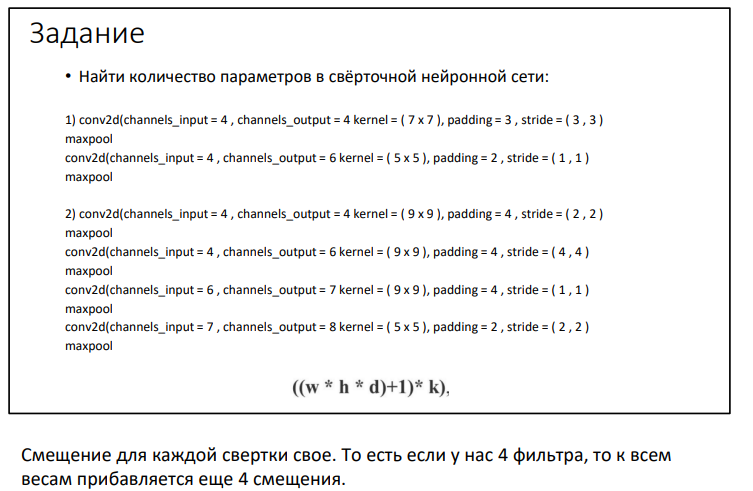

In [50]:
import torch

model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels = 4 , out_channels = 4, kernel_size = 7, padding = 3 , stride = 3),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(in_channels = 4 , out_channels = 6, kernel_size = 5, padding = 2 , stride = 3),
    torch.nn.MaxPool2d(2)
)
sum(p.numel() for p in model.parameters())

1394

In [51]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels = 4 , out_channels = 4, kernel_size = 9, padding = 4 , stride = 2),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(in_channels = 4 , out_channels = 6, kernel_size = 9, padding = 4 , stride = 4),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(in_channels = 6 , out_channels = 7, kernel_size = 9, padding = 4 , stride = 1),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(in_channels = 7 , out_channels = 8, kernel_size = 5, padding = 2 , stride = 2),
    torch.nn.MaxPool2d(2)
)
sum(p.numel() for p in model.parameters())

8067

w - размер ядра (kernel)

d - количество элементов фильтра (channels_input)

k - количество каналов (фильтров) на выходе (channels_output)

1.  (7 * 7 * 4 + 1) * 4 = 788

  (5 * 5 * 4 + 1) * 6 = 606
  
  788 + 606 = 1394

2. (9 * 9 * 4 + 1) * 4 =

  (9 * 9 * 6 + 1) * 6 =

  (5 * 5 * 4 + 1) * 6 =

  (5 * 5 * 4 + 1) * 6 =



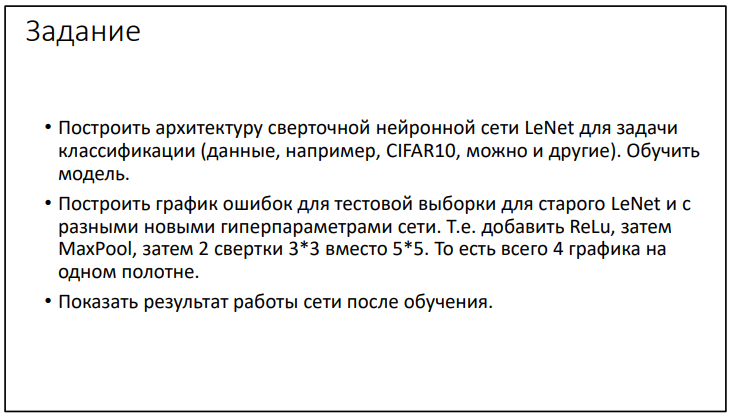

In [52]:
import torch
import pandas as pd
import numpy as np
import random
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


random.seed(0)
np.random.seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [53]:
torch


<module 'torch' from '/opt/conda/lib/python3.10/site-packages/torch/__init__.py'>

In [54]:
# transform, чтобы преобразовать в tensor

transform = transforms.Compose(
    #[transforms.Resize(224),
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

CIFAR10_train=torchvision.datasets.CIFAR10('./', download = True, train = True, transform=transform)
CIFAR10_test=torchvision.datasets.CIFAR10('./', download = True, train = False, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [55]:
#чтобы выгрузить labels
batch_size = 64
trainloader = torch.utils.data.DataLoader(CIFAR10_train, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(CIFAR10_test, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [56]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images and thier labels
labels

tensor([7, 5, 6, 3, 8, 6, 4, 6, 0, 4, 4, 5, 9, 8, 4, 4, 7, 1, 3, 5, 5, 7, 4, 4,
        4, 0, 7, 6, 9, 7, 9, 4, 4, 6, 5, 4, 7, 4, 7, 9, 8, 9, 6, 9, 3, 4, 4, 4,
        9, 7, 4, 4, 6, 4, 7, 5, 4, 0, 1, 8, 7, 8, 6, 3])

# First Model

In [57]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super (LeNet5, self).__init__()

    self.conv1 = torch.nn.Conv2d(
        in_channels = 3, out_channels=6, kernel_size = 5)#, padding = 2)
    #один канал на входе, так как картинка одномерная (не RGB, а graysсale)
    #на выходе будет 6 каналов, на вход подавалась 32 на 32, но у нас 28 на 28
    #следовательно, чтобы картинка не уменьшилась до 24 на 24, мы делаем паддинг 2
    #чтобы сохранить размер
    #Conv2d - потому что картинка плоская, двумерная, если бы было трехмерное
    #изображение, то сделали ли бы Conv3d
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d (kernel_size= 2, stride= 2)
    self.conv2 = torch.nn.Conv2d(
        in_channels = 6, out_channels=16, kernel_size = 5, padding = 0)
    self.act2 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d (kernel_size= 2, stride=2)

    # получаем изображение 16 на 5 на 5. Далее растянем изображение, для подачи
    # в полносвязный слой

    self.fc1 = torch.nn.Linear(5*5*16,120)
    self.act3 = torch.nn.Tanh()

    self.fc2 = torch.nn.Linear(120,84)
    self.act4 = torch.nn.Tanh()

    self.fc3 = torch.nn.Linear(84,10)

  def forward(self,x):
    #print(x.size())
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    #print(x.size())
    x = self.act2(x)
    #print(x.size())
    x = self.pool2(x)

    #растягиваем тензор
    #x.size(0) - размер батча, остальное перемножаем
    #print(x.size())
    x = x.view(x.size(0), x.size(1)* x.size(2) * x.size(3))
    #print(x.size())

    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)

    return x

net = LeNet5()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = net.to(device)

In [58]:
test_acc_1 = []
test_loss_1 = []

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01, momentum=0.7)

#X_test = X_test.to(device)
#y_test = y_test.to(device)

for e in range(10):
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        X_batch, y_batch = data
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        preds = net.forward(X_batch)
        loss_val = loss(preds, y_batch)
        loss_val.backward()
        optimizer.step()
    with torch.no_grad():
        correct = 0
        total = 0
        epoch_loss = []
        for data in testloader:
            X_test, y_test = data
            X_test = X_test.to(device)
            y_test = y_test.to(device)

            test_preds = net.forward(X_test)

            total += y_test.size(0)

            _, preds = torch.max(test_preds, 1)
            #print(preds.size())
            #print(y_test.size())
            correct += (preds == y_test).sum().item()

            epoch_loss.append(loss(test_preds, y_test).data.cpu())

        #acc = (test_preds.argmax(dim = 1) == y_test).float().mean().data.cpu()
        #test_acc.append(acc)
        test_loss_1.append(sum(epoch_loss)/len(epoch_loss))
        test_acc_1.append(correct / total)

    #print(acc)
    print('Epoch:', e)
    print('Loss:', float(test_loss_1[-1]))
    print('Accuracy:', correct / total)

Epoch: 0
Loss: 1.8205711841583252
Accuracy: 0.3518
Epoch: 1
Loss: 1.6463379859924316
Accuracy: 0.4153
Epoch: 2
Loss: 1.544994831085205
Accuracy: 0.4473
Epoch: 3
Loss: 1.446002721786499
Accuracy: 0.4798
Epoch: 4
Loss: 1.4318201541900635
Accuracy: 0.4862
Epoch: 5
Loss: 1.3503342866897583
Accuracy: 0.5196


KeyboardInterrupt: 

# Model with ReLU

In [ ]:
class LeNetR(torch.nn.Module):
  def __init__(self):
    super (LeNetR, self).__init__()

    self.conv1 = torch.nn.Conv2d(
        in_channels = 3, out_channels=6, kernel_size = 5)#, padding = 2)
    #один канал на входе, так как картинка одномерная (не RGB, а graysсale)
    #на выходе будет 6 каналов, на вход подавалась 32 на 32, но у нас 28 на 28
    #следовательно, чтобы картинка не уменьшилась до 24 на 24, мы делаем паддинг 2
    #чтобы сохранить размер
    #Conv2d - потому что картинка плоская, двумерная, если бы было трехмерное
    #изображение, то сделали ли бы Conv3d
    self.act1 = torch.nn.ReLU()
    self.pool1 = torch.nn.AvgPool2d (kernel_size= 2, stride= 2)
    self.conv2 = torch.nn.Conv2d(
        in_channels = 6, out_channels=16, kernel_size = 5, padding = 0)
    self.act2 = torch.nn.ReLU()
    self.pool2 = torch.nn.AvgPool2d (kernel_size= 2, stride=2)

    # получаем изображение 16 на 5 на 5. Далее растянем изображение, для подачи
    # в полносвязный слой

    self.fc1 = torch.nn.Linear(5*5*16,120)
    self.act3 = torch.nn.ReLU()

    self.fc2 = torch.nn.Linear(120,84)
    self.act4 = torch.nn.ReLU()

    self.fc3 = torch.nn.Linear(84,10)

  def forward(self,x):
    #print(x.size())
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    #print(x.size())
    x = self.act2(x)
    #print(x.size())
    x = self.pool2(x)

    #растягиваем тензор
    #x.size(0) - размер батча, остальное перемножаем
    #print(x.size())
    x = x.view(x.size(0), x.size(1)* x.size(2) * x.size(3))
    #print(x.size())

    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)

    return x

net_relu = LeNetR()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net_relu = net_relu.to(device)

In [ ]:
test_acc_2 = []
test_loss_2 = []

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_relu.parameters(), lr = 0.01, momentum=0.7)

#X_test = X_test.to(device)
#y_test = y_test.to(device)

for e in range(10):
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        X_batch, y_batch = data
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        preds = net_relu.forward(X_batch)
        loss_val = loss(preds, y_batch)
        loss_val.backward()
        optimizer.step()
    with torch.no_grad():
        correct = 0
        total = 0
        epoch_loss = []
        for data in testloader:
            X_test, y_test = data
            X_test = X_test.to(device)
            y_test = y_test.to(device)

            test_preds = net_relu.forward(X_test)

            total += y_test.size(0)

            _, preds = torch.max(test_preds, 1)
            #print(preds.size())
            #print(y_test.size())
            correct += (preds == y_test).sum().item()

            epoch_loss.append(loss(test_preds, y_test).data.cpu())

        #acc = (test_preds.argmax(dim = 1) == y_test).float().mean().data.cpu()
        #test_acc.append(acc)
        test_loss_2.append(sum(epoch_loss)/len(epoch_loss))
        test_acc_2.append(correct / total)

    #print(acc)
    print('Epoch:', e)
    print('Loss:', float(test_loss_2[-1]))
    print('Accuracy:', correct / total)

# Model with MaxPool

In [ ]:
class LeNetM(torch.nn.Module):
  def __init__(self):
    super (LeNetM, self).__init__()

    self.conv1 = torch.nn.Conv2d(
        in_channels = 3, out_channels=6, kernel_size = 5)#, padding = 2)
    self.act1 = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d (kernel_size= 2, stride= 2)
    self.conv2 = torch.nn.Conv2d(
        in_channels = 6, out_channels=16, kernel_size = 5, padding = 0)
    self.act2 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d (kernel_size= 2, stride=2)

    self.fc1 = torch.nn.Linear(5*5*16,120)
    self.act3 = torch.nn.ReLU()

    self.fc2 = torch.nn.Linear(120,84)
    self.act4 = torch.nn.ReLU()

    self.fc3 = torch.nn.Linear(84,10)

  def forward(self,x):
    #print(x.size())
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    #print(x.size())
    x = self.act2(x)
    #print(x.size())
    x = self.pool2(x)

    #растягиваем тензор
    #x.size(0) - размер батча, остальное перемножаем
    #print(x.size())
    x = x.view(x.size(0), x.size(1)* x.size(2) * x.size(3))
    #print(x.size())

    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)

    return x

net_max = LeNetM()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net_max = net_max.to(device)

In [ ]:
test_acc_3 = []
test_loss_3 = []

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_max.parameters(), lr = 0.01, momentum=0.7)

#X_test = X_test.to(device)
#y_test = y_test.to(device)

for e in range(10):
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        X_batch, y_batch = data
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        preds = net_max.forward(X_batch)
        loss_val = loss(preds, y_batch)
        loss_val.backward()
        optimizer.step()
    with torch.no_grad():
        correct = 0
        total = 0
        epoch_loss = []
        for data in testloader:
            X_test, y_test = data
            X_test = X_test.to(device)
            y_test = y_test.to(device)

            test_preds = net_max.forward(X_test)

            total += y_test.size(0)

            _, preds = torch.max(test_preds, 1)
            #print(preds.size())
            #print(y_test.size())
            correct += (preds == y_test).sum().item()

            epoch_loss.append(loss(test_preds, y_test).data.cpu())

        #acc = (test_preds.argmax(dim = 1) == y_test).float().mean().data.cpu()
        #test_acc.append(acc)
        test_loss_3.append(sum(epoch_loss)/len(epoch_loss))
        test_acc_3.append(correct / total)

    #print(acc)
    print('Epoch:', e)
    print('Loss:', float(test_loss_3[-1]))
    print('Accuracy:', correct / total)

# Model with 3x3 Kernel

In [ ]:
class LeNet3(torch.nn.Module):
  def __init__(self):
    super (LeNet3, self).__init__()

    self.conv1 = torch.nn.Conv2d(
        in_channels = 3, out_channels=6, kernel_size = 3)#, padding = 2)
    self.act1 = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d (kernel_size= 2, stride= 2)
    self.conv2 = torch.nn.Conv2d(
        in_channels = 6, out_channels=16, kernel_size = 3, padding = 0)
    self.act2 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d (kernel_size= 2, stride=2)

    self.fc1 = torch.nn.Linear(6*6*16,120)
    self.act3 = torch.nn.ReLU()

    self.fc2 = torch.nn.Linear(120,84)
    self.act4 = torch.nn.ReLU()

    self.fc3 = torch.nn.Linear(84,10)

  def forward(self,x):
    #print(x.size())
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    #print(x.size())
    x = self.act2(x)
    #print(x.size())
    x = self.pool2(x)

    #растягиваем тензор
    #x.size(0) - размер батча, остальное перемножаем
    #print(x.size())
    x = x.view(x.size(0), x.size(1)* x.size(2) * x.size(3))
    #print(x.size())

    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)

    return x

net_3 = LeNet3()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net_3 = net_3.to(device)

In [ ]:
test_acc_4 = []
test_loss_4 = []

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_3.parameters(), lr = 0.01, momentum=0.7)

#X_test = X_test.to(device)
#y_test = y_test.to(device)

for e in range(10):
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        X_batch, y_batch = data
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        preds = net_3.forward(X_batch)
        loss_val = loss(preds, y_batch)
        loss_val.backward()
        optimizer.step()
    with torch.no_grad():
        correct = 0
        total = 0
        epoch_loss = []
        for data in testloader:
            X_test, y_test = data
            X_test = X_test.to(device)
            y_test = y_test.to(device)

            test_preds = net_3.forward(X_test)

            total += y_test.size(0)

            _, preds = torch.max(test_preds, 1)
            #print(preds.size())
            #print(y_test.size())
            correct += (preds == y_test).sum().item()

            epoch_loss.append(loss(test_preds, y_test).data.cpu())

        #acc = (test_preds.argmax(dim = 1) == y_test).float().mean().data.cpu()
        #test_acc.append(acc)
        test_loss_4.append(sum(epoch_loss)/len(epoch_loss))
        test_acc_4.append(correct / total)

    #print(acc)
    print('Epoch:', e)
    print('Loss:', float(test_loss_4[-1]))
    print('Accuracy:', correct / total)

# Visualisation

In [ ]:
plt.plot(test_loss_1)
plt.plot(test_loss_2)
plt.plot(test_loss_3)
plt.plot(test_loss_4)

In [ ]:
plt.plot(test_acc_1)
plt.plot(test_acc_2)
plt.plot(test_acc_3)
plt.plot(test_acc_4)

# Практика 4 BatchNorm

In [59]:
class LeNetB(torch.nn.Module):
  def __init__(self):
    super (LeNetB, self).__init__()

    self.conv1 = torch.nn.Conv2d(
        in_channels = 3, out_channels=6, kernel_size = 5)#, padding = 2)
    self.batch1 = torch.nn.BatchNorm2d(6)
    self.act1 = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d (kernel_size= 2, stride= 2)
    self.conv2 = torch.nn.Conv2d(
        in_channels = 6, out_channels=16, kernel_size = 5, padding = 0)
    self.batch2 = torch.nn.BatchNorm2d(16)
    self.act2 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d (kernel_size= 2, stride=2)

    self.fc1 = torch.nn.Linear(5*5*16,120)
    self.act3 = torch.nn.ReLU()

    self.fc2 = torch.nn.Linear(120,84)
    self.act4 = torch.nn.ReLU()

    self.fc3 = torch.nn.Linear(84,10)

  def forward(self,x):
    #print(x.size())
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    #print(x.size())
    x = self.act2(x)
    #print(x.size())
    x = self.pool2(x)

    #растягиваем тензор
    #x.size(0) - размер батча, остальное перемножаем
    #print(x.size())
    x = x.view(x.size(0), x.size(1)* x.size(2) * x.size(3))
    #print(x.size())

    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)

    return x

net_b = LeNetB()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net_b = net_b.to(device)

In [60]:
test_acc_5 = []
test_loss_5 = []

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_b.parameters(), lr = 0.01, momentum=0.7)

#X_test = X_test.to(device)
#y_test = y_test.to(device)

for e in range(5):
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        X_batch, y_batch = data
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        preds = net_b.forward(X_batch)
        loss_val = loss(preds, y_batch)
        loss_val.backward()
        optimizer.step()
    net_b.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        epoch_loss = []
        for data in testloader:
            X_test, y_test = data
            X_test = X_test.to(device)
            y_test = y_test.to(device)

            test_preds = net_b.forward(X_test)

            total += y_test.size(0)

            _, preds = torch.max(test_preds, 1)
            #print(preds.size())
            #print(y_test.size())
            correct += (preds == y_test).sum().item()

            epoch_loss.append(loss(test_preds, y_test).data.cpu())

        #acc = (test_preds.argmax(dim = 1) == y_test).float().mean().data.cpu()
        #test_acc.append(acc)
        test_loss_5.append(sum(epoch_loss)/len(epoch_loss))
        test_acc_5.append(correct / total)
    net_b.train()

    #print(acc)
    print('Epoch:', e)
    print('Loss:', float(test_loss_5[-1]))
    print('Accuracy:', correct / total)

Epoch: 0
Loss: 1.8305084705352783
Accuracy: 0.3198
Epoch: 1
Loss: 1.538954496383667
Accuracy: 0.4312
Epoch: 2
Loss: 1.4408785104751587
Accuracy: 0.4827
Epoch: 3
Loss: 1.330868124961853
Accuracy: 0.5229
Epoch: 4
Loss: 1.271782398223877
Accuracy: 0.5448


# Практика 4

## Загрузка данных

In [ ]:
#!mkdir ~/.kaggle
#!touch ~/.kaggle/kaggle.json

In [ ]:
#api_token = {"username":"kgulina","key":"06293fe7dac7e71f1a0daa0d5faf29a0"}

#import json

#with open('/root/.kaggle/kaggle.json', 'w') as file:
#    json.dump(api_token, file)

In [ ]:
#!kaggle competitions download -c generated-or-not

In [ ]:
#!unzip '/kaggle/working/generated-or-not.zip' -d data

In [ ]:
#df = pd.read_csv('/kaggle/input/butterfly-image-classification/Training_set.csv')

#df.head()

In [61]:
from torchvision import datasets, models, transforms
from tqdm.notebook import tqdm

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [70]:
transform = transforms.Compose(
    [transforms.Resize(224),
    transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

CIFAR10_train=torchvision.datasets.CIFAR10('./', download = True, train = True, transform=transform)
CIFAR10_test=torchvision.datasets.CIFAR10('./', download = True, train = False, transform=transform)

batch_size = 100
trainloader = torch.utils.data.DataLoader(CIFAR10_train, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(CIFAR10_test, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [71]:
from torchvision.models import alexnet

model = alexnet(pretrained=True)

model

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [72]:
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.0001)
loss_function = torch.nn.CrossEntropyLoss()

In [73]:
def train_model(train_loader, model, epochs, loss_function, optimizer):
    model= model.to(device)
    loss_history_model = []
    model.train()
    for epoch in tqdm(range(epochs)):
        for i, (batch, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            batch = batch.to(device)
            labels = labels.to(device)
            #print(batch)
            #print(labels)
            loss = loss_function(model(batch), labels)
            loss.backward()
            optimizer.step()
            loss_history_model.append(loss.cpu().item())
        print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')
    return loss_history_model

In [74]:
EPOCHS = 3
loss_model = train_model(trainloader,model,EPOCHS,loss_function,optimizer)

  0%|          | 0/3 [00:00<?, ?it/s]

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.6013205051422119
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.5673797130584717
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.4816891551017761


In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
def ConfMatrix(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    with torch.no_grad():                   # Не производить обратного подсчёта градиента, чтобы сеть не училась в процессе проверки
        for data, targets in loader:
            data = data.to(device)          # Перевод данных на ранее объявленное железо для просчёта всех вычислений
            targets = targets.to(device)    # Перевод целевых данных на карту
            #print(targets)
            preds = model(data)            # Прямое распространение информации по сети
            _, predictions = preds.max(1)  # Возвращаем позицию наибольшего выхода из сети
            #print(predictions)
            cm = confusion_matrix(targets.cpu(), predictions.cpu())
            f = f1_score(predictions.cpu(),targets.cpu(), average='macro')
    model.train()
    return cm, f

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 9, 8, 6, 7, 0, 4, 9,
        4, 2, 4, 0, 9, 6, 6, 5, 4, 3, 9, 8, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 3, 4, 3, 7, 5, 6, 3, 6, 6, 1, 2, 3, 7, 2, 6,
        8, 8, 9, 2, 9, 3, 5, 8, 8, 1, 1, 7, 2, 7, 2, 3, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7], device='cuda:0')
tensor([4, 4, 6, 3, 1, 1, 2, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 6, 7, 8, 3, 1, 2,
        8, 2, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 8, 6, 5, 6, 3, 8, 7, 6, 5,
        5, 3, 0, 9, 6, 0, 0, 5, 3, 9, 3, 4, 2, 1, 3, 6, 2, 4, 8, 4, 5, 0, 9, 9,
        9, 8, 9, 9, 3, 7, 3, 0, 0, 5, 2, 3, 3, 8, 6, 3, 3, 0, 5, 8, 0, 1, 7, 4,
        8, 8, 7, 8], device='cuda:0')
tensor([5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 4, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 4, 9, 5,
        3, 9, 4, 4, 4, 6, 5, 1, 3, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 2, 1, 8,
        2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 8, 9, 8, 1, 5, 3, 0, 8, 2, 4, 7, 0, 2, 3,
        6, 3, 8, 3, 0, 2, 4, 3, 9, 0, 6, 1, 

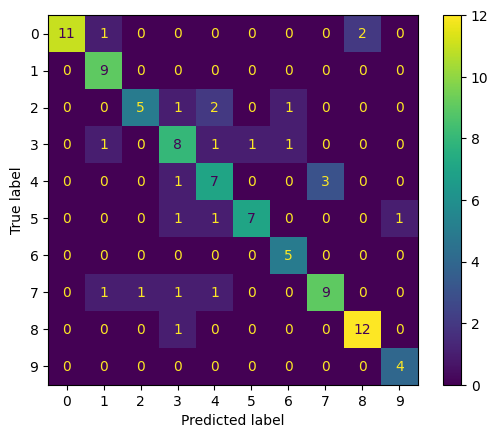

In [76]:
cm_test, f1_test = ConfMatrix(testloader, model)
_, f1_train = ConfMatrix(trainloader, model)
ConfusionMatrixDisplay(cm_test).plot()
print('test F1 score = ', f1_test)
print('train F1 score = ', f1_train)

## Feature Extractor

In [77]:
model_1 = alexnet(pretrained=True)
for param in model_1.parameters():
    param.requires_grad = False
model_1.classifier = torch.nn.Linear(9216, 10)
model_1

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Linear(in_features=9216, out_features=10, bias=True)
)

In [80]:
optimizer = torch.optim.Adam(model_1.classifier.parameters(), lr=0.0001)
loss_function = torch.nn.CrossEntropyLoss()

EPOCHS = 3
loss_model2 = train_model(trainloader,model_1,EPOCHS,loss_function,optimizer)

  0%|          | 0/3 [00:00<?, ?it/s]

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.6409947276115417
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.5430545806884766
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.5161684155464172


test F1 score =  0.7835619361867849
train F1 score =  0.8475746943115364


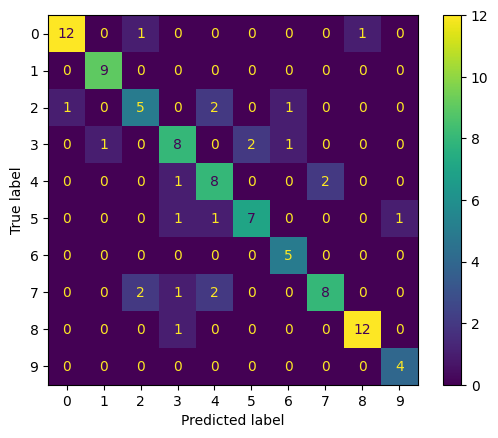

In [81]:
cm_test, f1_test = ConfMatrix(testloader, model_1)
_, f1_train = ConfMatrix(trainloader, model_1)
ConfusionMatrixDisplay(cm_test).plot()
print('test F1 score = ', f1_test)
print('train F1 score = ', f1_train)

## Fine-tuning

In [82]:
model_fc_conv = alexnet(pretrained=True)
model_fc_conv.classifier = torch.nn.Linear(9216, 10)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [83]:
optimizer = torch.optim.Adam(model_fc_conv.parameters(), lr=0.0001)
loss_function = torch.nn.CrossEntropyLoss()

EPOCHS = 3
loss_model3 = train_model(trainloader,model_fc_conv,EPOCHS,loss_function,optimizer)

  0%|          | 0/3 [00:00<?, ?it/s]

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.5413782000541687
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.3152099549770355
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.19461114704608917


test F1 score =  0.8800878348704437
train F1 score =  0.9380193751659537


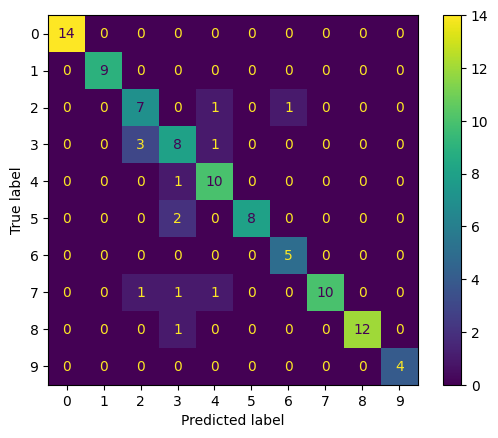

In [84]:
cm_test, f1_test = ConfMatrix(testloader, model_fc_conv)
_, f1_train = ConfMatrix(trainloader, model_fc_conv)
ConfusionMatrixDisplay(cm_test).plot()
print('test F1 score = ', f1_test)
print('train F1 score = ', f1_train)